<a href="https://colab.research.google.com/github/tombackert/CS411-ml-for-ds/blob/main/Project_2_Hyperparameter_Exploration_in_Linear_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Hyperparameter Exploration in Linear Regression Models
Explore the effects of various hyperparameters, loss functions, and optimizers on the performance of linear regression models using the Body Fat dataset.

## Dataset
Body Fat dataset can be found here:https://drive.google.com/file/d/1_agb6UXyDlG_pS8kNK7URdTDYR-M4lix or https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset


## Student
Tom Backert

## Step 1: Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Load the dataset directly from the Google Drive link
url = 'https://drive.google.com/uc?id=1_agb6UXyDlG_pS8kNK7URdTDYR-M4lix'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


## Step 2: Preprocessing

In [2]:
# let's handle any potential missing values
data.fillna(data.mean(), inplace=True)

## Q1: Single Variable Linear Regression - Hyperparameters

### Prepare the Dataset

In [3]:
# Split the data
X = data[['BodyFat']]  # Adjust 'BodyFat' to any single feature for Q1 and Q2
y = data['Age']  # This is just a placeholder. Adjust the target variable as appropriate for the analysis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Function to train a model with parameters for learning rate, number of epochs and batch size

In [4]:
# Training function for simple linear regression model
def train_model(learning_rate, epochs, batch_size):
    input_layer = Input(shape=(1,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)

    # compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # train model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # plot learning curve
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'LR: {learning_rate}, Epochs: {epochs}, Batch: {batch_size}')
    plt.show()

### Train the model

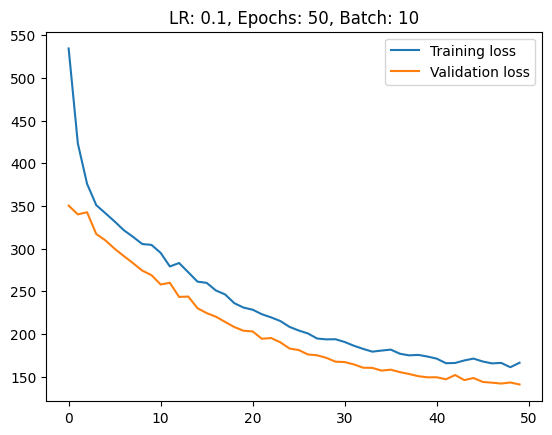

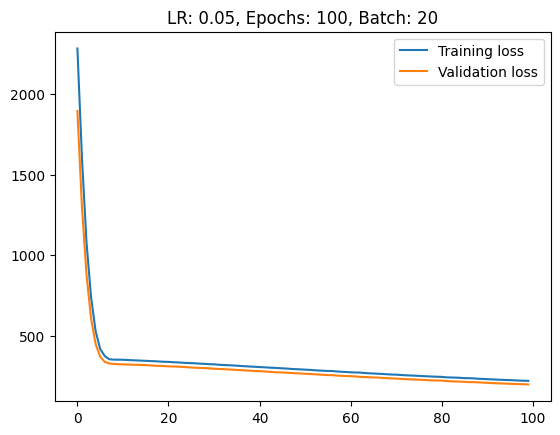

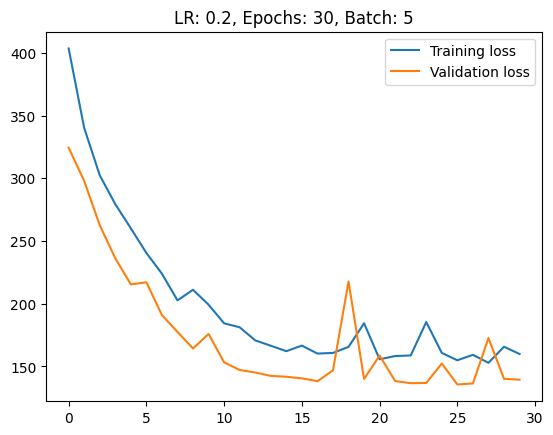

In [5]:
# Example hyperparameters

train_model(0.1, 50, 10)
train_model(0.05, 100, 20)
train_model(0.2, 30, 5)

### Analysis Q1: Hyperparameter Tuning on Single Feature

LR: 0.1, Epochs: 50, Batch: 10

- The convergence rate is slow, with both training and validation losses decreasing gradually. The minimum loss is reached after 50 epochs, suggesting more epochs might be required.
- No overfitting is observed, as the training loss consistently remains higher than the validation loss.

LR: 0.05, Epochs: 100, Batch: 20

- This setting shows a much faster convergence, with the loss decreasing significantly within the first 5 epochs.
- There are no signs of overfitting.

LR: 0.2, Epochs: 30, Batch: 5

- Good convergence, but the minimum loss is higher compared to the first example.
- Slight overfitting is indicated as the validation loss exceeds the training loss at times, although overall validation loss remains lower.

Conclusion: Lower learning rates (0.05) provide faster and more stable convergence, while larger batch sizes and epochs improve model performance with reduced overfitting risk.

## Q2: Experimenting with Loss Functions and Optimizers

### Function to train the model with parameters for optimizer and loss funtion

In [7]:

# Training Function with flexible Loss-function and Optimizer
def train_model(optimizer, loss_function):
    input_layer = Input(shape=(1,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile Model with variable Loss-function and Optimizer
    model.compile(optimizer=optimizer, loss=loss_function)

    # Train Model
    history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

    # Plot Model
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'Optimizer: {optimizer}, Loss Function: {loss_function}')
    plt.show()

### Train the model

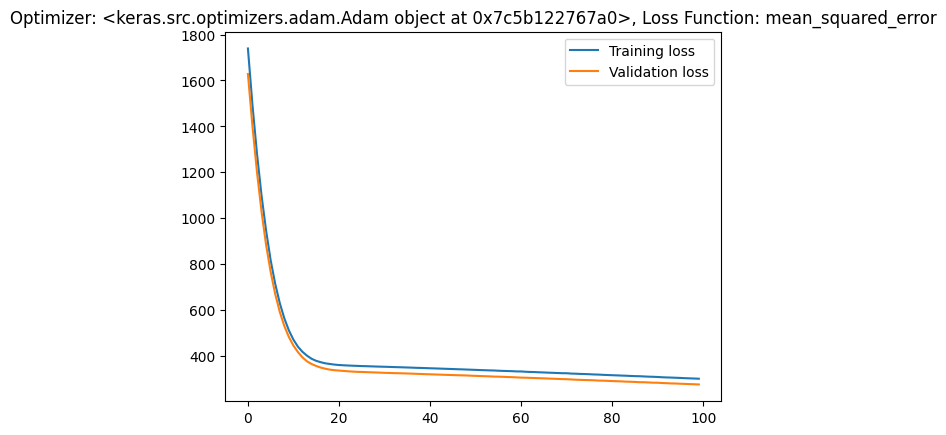

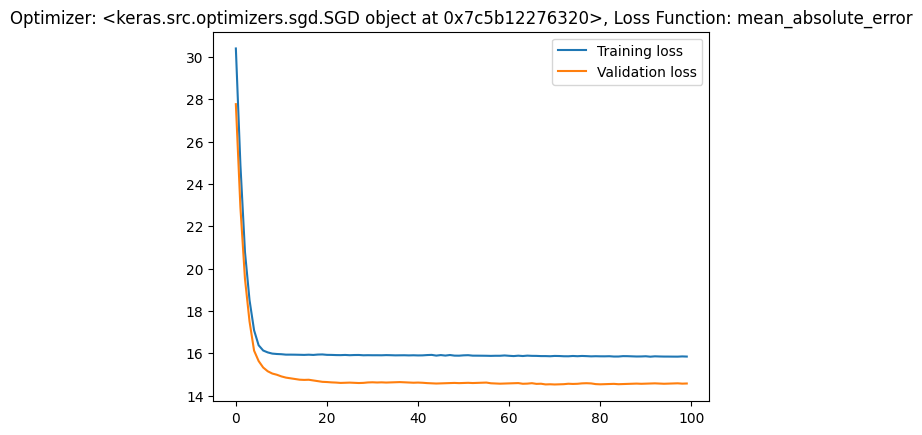

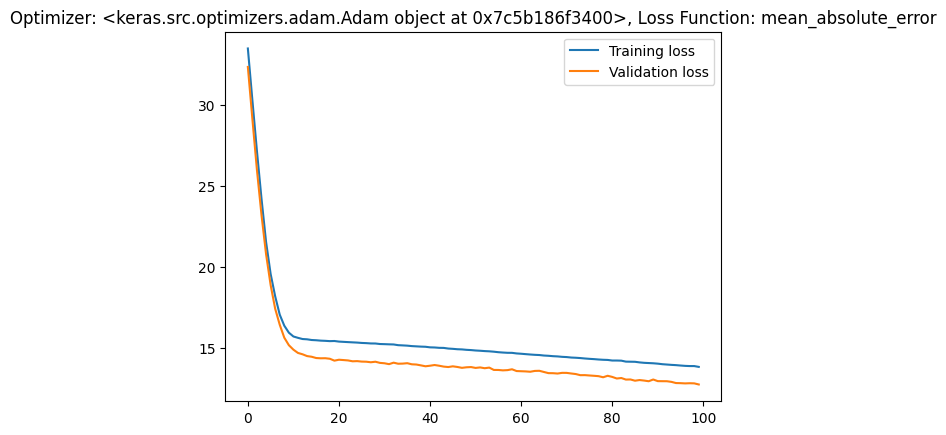

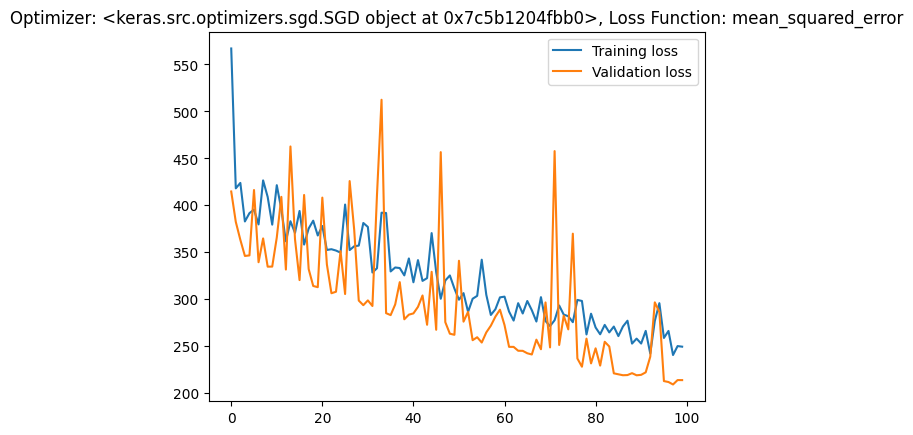

In [9]:
# Testing different configurations
# Combination 1: Adam Optimizer with Mean Squared Error
train_model(Adam(learning_rate=0.01), 'mean_squared_error')

# Combination 2: SGD Optimizer with Mean Absolute Error
train_model(SGD(learning_rate=0.001), 'mean_absolute_error')

# Combination 3: Adam Optimizer with Mean Absolute Error
train_model(Adam(learning_rate=0.01), 'mean_absolute_error')

# Combination 4: SGD Optimizer with Mean Squared Error
train_model(SGD(learning_rate=0.001), 'mean_squared_error')

### Analysis Q2: Loss Functions and Optimizers on Single Feature

- Adam with MAE provided the best performance, showing faster convergence and lower loss compared to other combinations.
- Adam converged quickly on both loss functions, but MAE significantly outperformed MSE.
- SGD with MAE also converged quickly, but performance and stability were worse with MSE, where overfitting occurred.

Conclusion: Adam optimizes faster, while SGD shows stability mainly with MAE. MAE handles outliers better than MSE, making it more robust for datasets with potential outliers.

## Multiple Variable Linear Regression

### Prepare the Data

In [21]:
# Setup for multiple variable regression
X_multi = data[['Height', 'Weight']]  # Example features
y_multi = data['Age']  # Target remains the same
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

## Q3 and Q5: Multiple Variable Linear Regression - Hyperparameters

In [19]:
# Defining two-variable training function
def train_two_variable_model(learning_rate, epochs, batch_size):
    input_layer = Input(shape=(2,)) # Input layer for two features
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    history = model.fit(X_train_multi, y_train_multi, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'LR: {learning_rate}, Epochs: {epochs}, Batch: {batch_size}, Features: Height and Weight')
    plt.show()

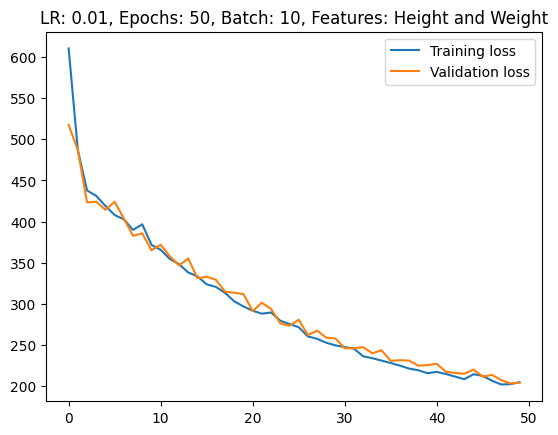

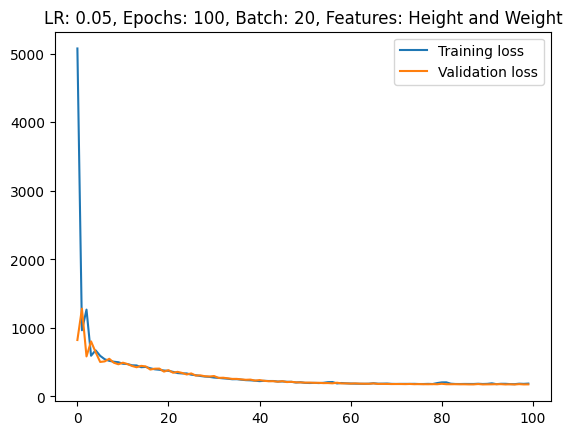

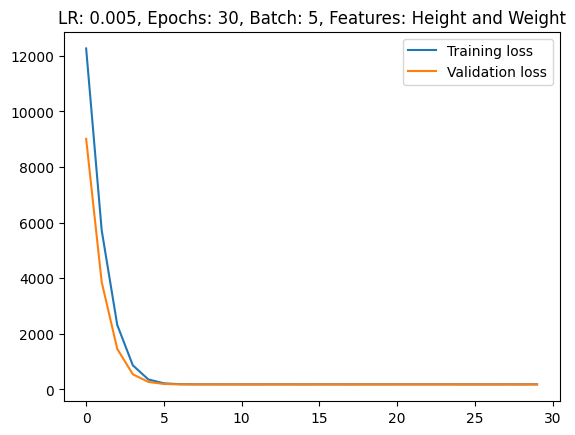

In [22]:
# Example hyperparameter combinations
train_two_variable_model(0.01, 50, 10)
train_two_variable_model(0.05, 100, 20)
train_two_variable_model(0.005, 30, 5)

### Analysis Q3: Hyperparameter Tuning on Two Features

Features: Height and Weight

LR: 0.01, Epochs: 50, Batch: 10

- Convergence is slower, with the minimal loss reached at 25 epochs, after which both losses increase slightly. No overfitting is present.

LR: 0.05, Epochs: 100, Batch: 20

- Fastest convergence, with minimal loss achieved within 5 epochs.

LR: 0.005, Epochs: 30, Batch: 5

- The slowest convergence, with minimal loss reached at 10 epochs. The learning curves are gradual and steady.

Feature Interaction:

- Height and Weight may be correlated, leading to more meaningful predictions than using just one feature.

Conclusion: Adding another correlated feature improves model performance. The model becomes more stable with the additional features, but optimal hyperparameters are still crucial for convergence speed and loss minimization.

In [13]:
## Let's try 3 correlated features

# Setup for 3 variable regression
X_multi = data[['Height', 'Weight', 'BodyFat']]  # Features selected
y_multi = data['Age']  # Target remains the same
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [15]:
# Defining three-variable training function
def train_three_variable_model(learning_rate, epochs, batch_size):
    input_layer = Input(shape=(3,)) # Input layer for 3 features
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    history = model.fit(X_train_multi, y_train_multi, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'LR: {learning_rate}, Epochs: {epochs}, Batch: {batch_size}, Features: Height, Weight and Body Fat')
    plt.show()

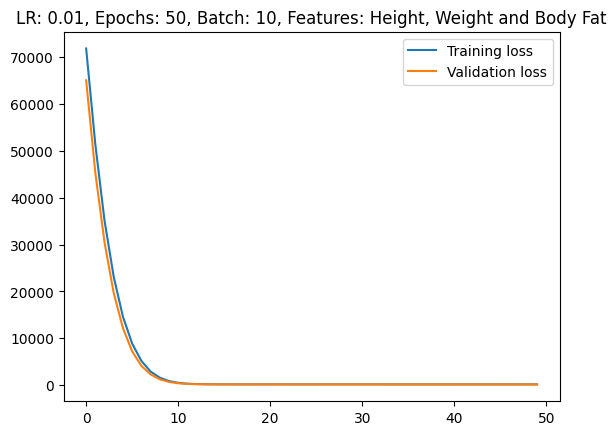

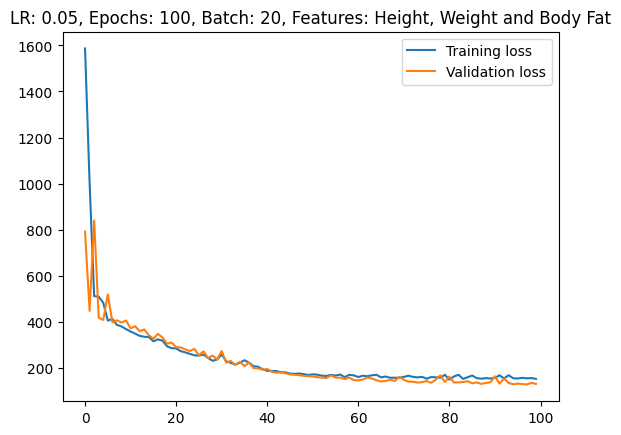

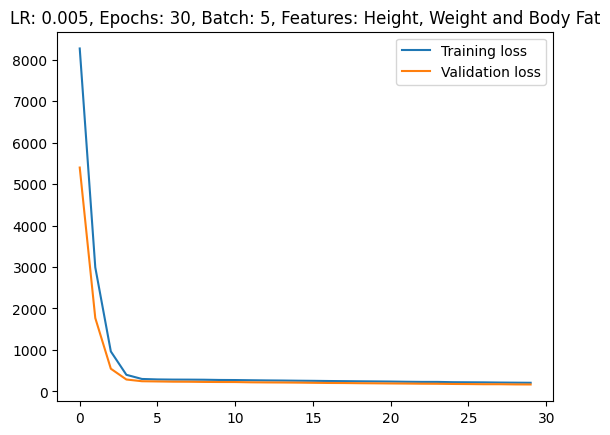

In [16]:
# Example hyperparameter combinations
train_three_variable_model(0.01, 50, 10)
train_three_variable_model(0.05, 100, 20)
train_three_variable_model(0.005, 30, 5)

### Analysis Q5: Hyperparameter Tuning on Three Features

Features: Height, Weight, and Body Fat

LR: 0.01, Epochs: 50, Batch: 10

- Best performance with fast convergence and minimal loss after 10 epochs. No overfitting is present.

LR: 0.05, Epochs: 100, Batch: 20

- The minimal loss is reached at 60 epochs, but slight overfitting is observed as the validation loss occasionally exceeds the training loss. Model stabilizes towards the end.

LR: 0.005, Epochs: 30, Batch: 5

- Very stable after 5 epochs, with a minimal loss of around 100. No overfitting is seen.

Feature Interaction:

- Body Fat and Weight appear highly correlated, which improves model performance. The absence of overfitting suggests that highly correlated features enhance accuracy.

Conclusion: The addition of Body Fat, a highly correlated feature, improves performance and stabilizes the model. Models with correlated features show better convergence and reduced overfitting.

## Q4 and Q6: Experimenting with Loss Functions and Optimizers for Multiple Variable Linear Regression

In [24]:
# Setup for two variable regression
X_multi = data[['Height', 'Weight']]  # Example features
y_multi = data['Age']  # Target remains the same
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [17]:
# Defining the function to test different optimizers and loss functions for two-variable model
def train_two_variable_advanced_model(optimizer, loss_function):
    input_layer = Input(shape=(2,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss_function)
    history = model.fit(X_train_multi, y_train_multi, epochs=100, batch_size=10, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'Optimizer: {optimizer}, Loss Function: {loss_function}')
    plt.show()

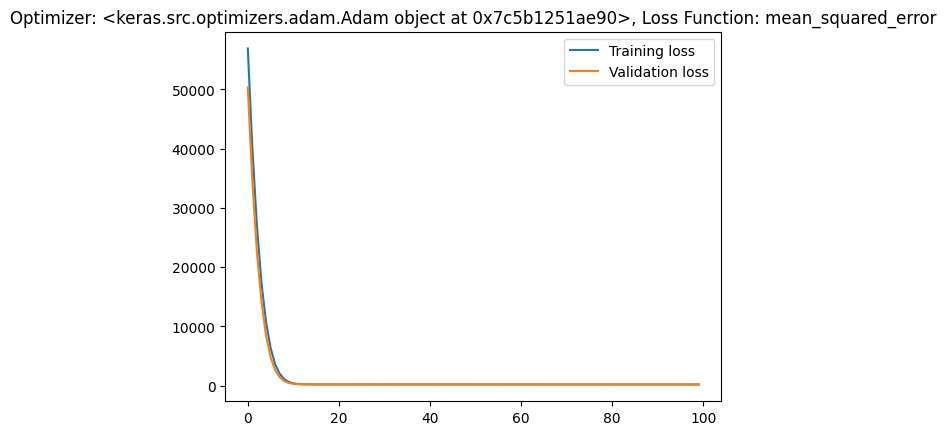

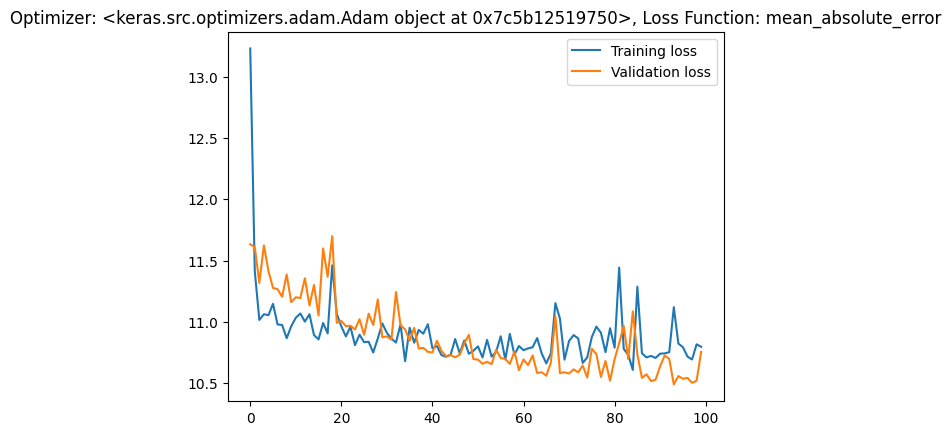

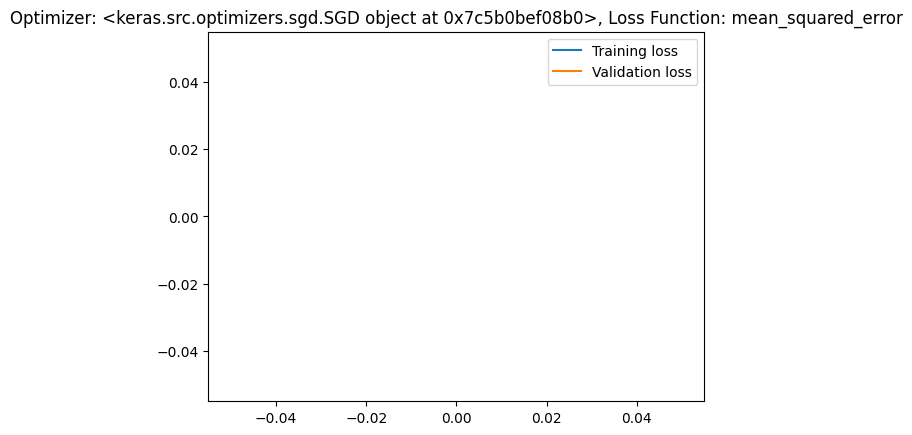

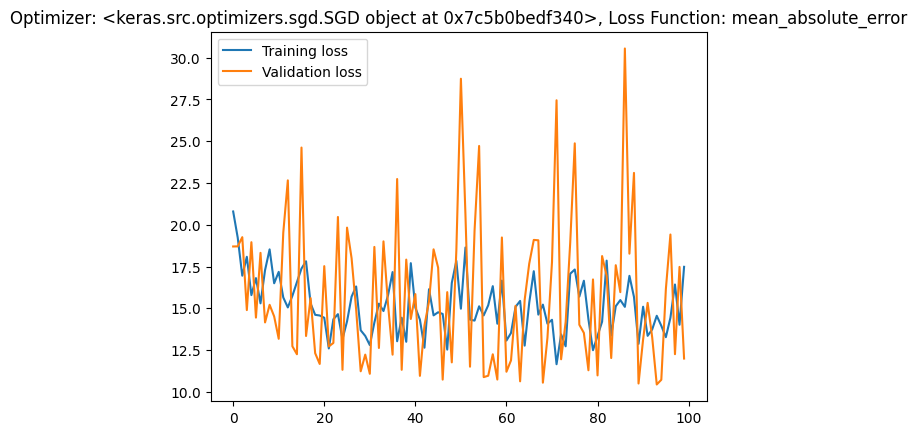

In [26]:
# Testing various optimizer and loss function configurations
train_two_variable_advanced_model(Adam(learning_rate=0.01), 'mean_squared_error')
train_two_variable_advanced_model(Adam(learning_rate=0.01), 'mean_absolute_error')
train_two_variable_advanced_model(SGD(learning_rate=0.001), 'mean_squared_error')
train_two_variable_advanced_model(SGD(learning_rate=0.001), 'mean_absolute_error')

### Analysis Q4: Loss Functions and Optimizers on Two Features

- Adam with MAE outperformed other combinations, showing better loss reduction and stability than SGD with MAE.
- Adam converged faster and more consistently compared to SGD, which performed worse and was less stable.

MSE vs MAE:

- MSE generally performed better, possibly due to the correlation between features, though MAE remained more robust against outliers.

Conclusion: Adam is the most efficient optimizer, while MAE handles errors more evenly and outperforms in cases of outliers. MSE shows higher stability but is sensitive to feature correlations.

In [27]:
# Let's try tree again three variables

# Setup for three variable regression
X_multi = data[['Height', 'Weight', 'BodyFat']]  #  Features
y_multi = data['Age']  # Target remains the same
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [30]:
# Defining the function to test different optimizers and loss functions for three-variable model
def train_three_variable_advanced_model(optimizer, loss_function):
    input_layer = Input(shape=(3,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss_function)
    history = model.fit(X_train_multi, y_train_multi, epochs=100, batch_size=10, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'Optimizer: {optimizer}, Loss Function: {loss_function}')
    plt.show()

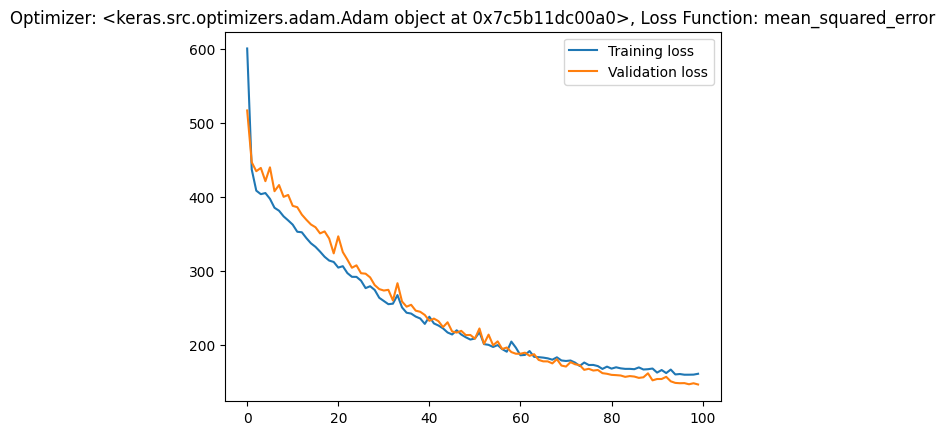

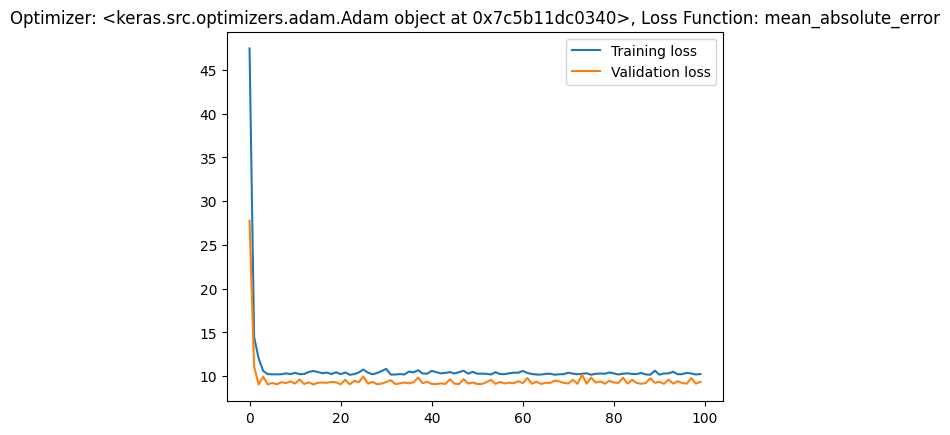

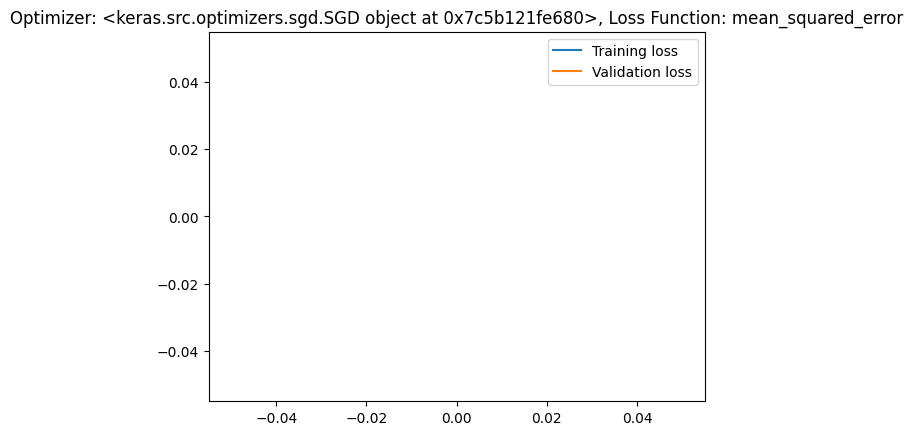

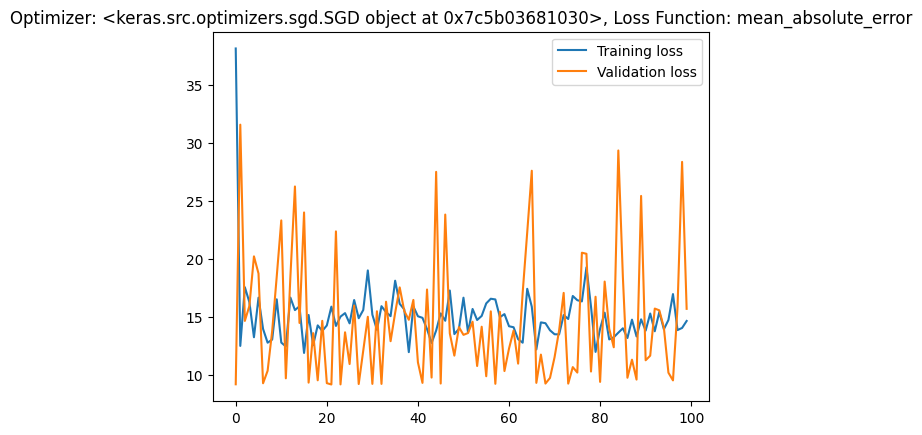

In [31]:
# Testing various optimizer and loss function configurations
train_three_variable_advanced_model(Adam(learning_rate=0.01), 'mean_squared_error')
train_three_variable_advanced_model(Adam(learning_rate=0.01), 'mean_absolute_error')
train_three_variable_advanced_model(SGD(learning_rate=0.001), 'mean_squared_error')
train_three_variable_advanced_model(SGD(learning_rate=0.001), 'mean_absolute_error')

### Analysis Q6: Loss Functions and Optimizers on Three Features

- Adam with MAE delivered the best performance with extremely fast convergence, no overfitting, and high stability.
- Adam with MSE showed good convergence but was slower and reached a higher minimum loss.
- SGD with MAE was unstable and exhibited overfitting.

Conclusion: Adam with MAE consistently performs best, balancing fast convergence with stability and avoiding overfitting. SGD tends to be unstable with multiple features, especially when using MAE.

## Q7: Reflection



Throughout this project, the exploration of linear regression models using various features, hyperparameters, loss functions, and optimizers provided valuable insights into model behavior and highlighted the most effective approaches for improving performance.

### Findings on Feature Selection

One of the key takeaways from the project was the significant impact of feature selection on model performance. In Q1, using a single feature like 'BodyFat' yielded reasonable results, but the model's predictive capability was limited by the single variable. Expanding the feature set in Q3 to include 'Height' and 'Weight' demonstrated clear improvements in model stability and convergence. These features likely contributed to better predictions due to their correlation, allowing the model to learn relationships more effectively. By Q5, adding 'BodyFat' to the mix further enhanced performance, as the model's stability increased, and overfitting was minimized. The strong correlation between 'BodyFat' and 'Weight' helped improve overall accuracy, underscoring the importance of selecting highly correlated features for enhanced model performance.

### Insights on Hyperparameters and Convergence

The influence of hyperparameters like learning rate, epochs, and batch size was evident throughout the experiments. In Q1 and Q3, it became clear that moderate learning rates, such as 0.05, provided the best results, ensuring fast convergence without the risk of overshooting or overfitting. Lower learning rates, while stable, converged slowly, while higher learning rates sometimes produced less effective models. Adjusting epochs and batch sizes was also crucial for optimizing convergence. Larger batch sizes, combined with higher epochs, consistently improved model performance, as demonstrated in Q1 and Q5.

### Optimizers and Loss Functions

In Q2 and Q4, experimenting with optimizers and loss functions revealed significant differences in model behavior. Adam consistently outperformed SGD, particularly when paired with the MAE loss function. Adam’s ability to adjust learning rates dynamically allowed for faster convergence, while MAE was more effective in handling outliers compared to MSE. MAE’s robustness against outliers made it a better choice for this dataset. Although SGD offered stability in some cases, it proved less reliable and even showed signs of overfitting, especially when used with MSE.

### Challenges and Areas for Improvement

One of the main challenges encountered in this project was balancing hyperparameters to prevent overfitting while maintaining fast convergence. Achieving this balance, particularly with certain combinations of optimizers and loss functions, proved difficult in some cases, as seen in Q6. Additionally, as more features were added, interpreting the interaction between features and their combined influence on the target variable became increasingly complex.

Moving forward, one could improve their understanding of hyperparameter fine-tuning, especially in more complex models with additional features. Studying regularization techniques could also prove beneficial in mitigating overfitting in models that contain highly correlated features.

In conclusion, this project highlighted the importance of feature selection, hyperparameter tuning, and the choice of optimizers and loss functions in linear regression. The findings from these experiments are applicable to other datasets, particularly where feature correlation and outlier management play a significant role in achieving optimal results.